# 2017-10-19 Flux vs. Wavelength

Cell below is used to import the necessarry items

"%matplotlib notebook" is used for the first graph in which zooming in/out would be useful

"%matplotlib inline" is used for the histogram graph, it overrides "%matplotlib notebook" so comment out if needed

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [3]:
wavelength, flux = np.genfromtxt("../data/hd23478_halpha/2017-10-19-HD23478-optimal.dat_n_vc", dtype=float, skip_header=2, usecols=(0,1), unpack=True)

In [4]:
wavelength

array([635.4495, 635.4608, 635.4721, ..., 675.1812, 675.19  , 675.1989])

In [5]:
flux

array([0.50659, 0.80273, 0.94749, ..., 1.6189 , 1.113  , 1.3664 ])

Text(0.5, 1.0, '2017-10-19 : Flux vs. Wavelength')

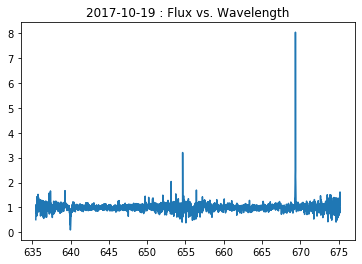

In [27]:
plt.plot(wavelength, flux)
plt.title('2017-10-19 : Flux vs. Wavelength')

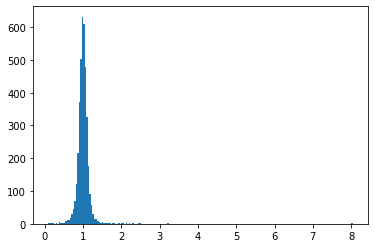

In [10]:
# Finding the histogram of the flux column from the data file.

num_bins=200

#Using flux variable from the second cell
plt.hist(flux, num_bins)
plt.show()

In [13]:
# Calculating the width of the histogram, also known as the standard deviation

std = np.std(flux, dtype=float)
std

0.18590016871314813

In [14]:
# Calculating the median value of flux

med = np.median(flux)
med

1.0005

In [15]:
# Range of 5*std from the median
add=med+(5*std) # 1.93
sub=med-(5*std) # 0.070999

In [16]:
# Indices for flux points greater than add
a = np.where(flux > add)
a

(array([1730, 1897, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280]),)

In [17]:
# Indices for flux points less than sub
b = np.where(flux < sub)
b
# There exists no flux points lower than sub

(array([], dtype=int64),)

In [18]:
# Indices for flux points within 5*std from the median
ins = np.where((flux < add) & (flux > sub))
ins

(array([   0,    1,    2, ..., 3902, 3903, 3904]),)

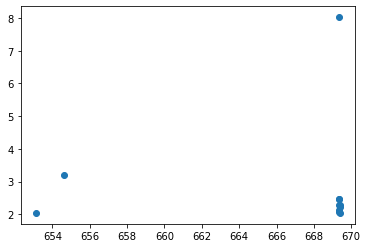

In [26]:
# Scatter Plot of Flux and Wavelenth at greater then 5*std from the median
plt.scatter(wavelength[a], flux[a])

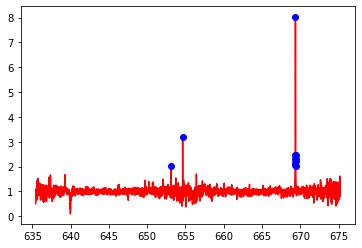

In [25]:
# Scatter plot over Spectrum plot
fig, ax = plt.subplots()
ax.scatter(wavelength[a], flux[a], color='b', zorder=1500)
ax.plot(wavelength, flux, color='r', zorder=1000)

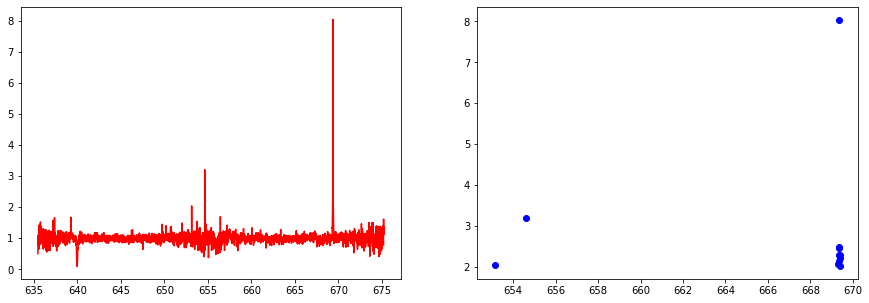

In [44]:
# Spectrum plot on the left, Scatter plot on the right
fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].plot(wavelength, flux, color='r')
ax[1].scatter(wavelength[a], flux[a], color='b')